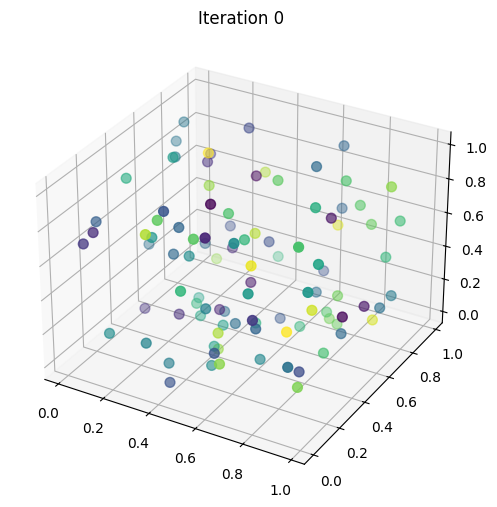

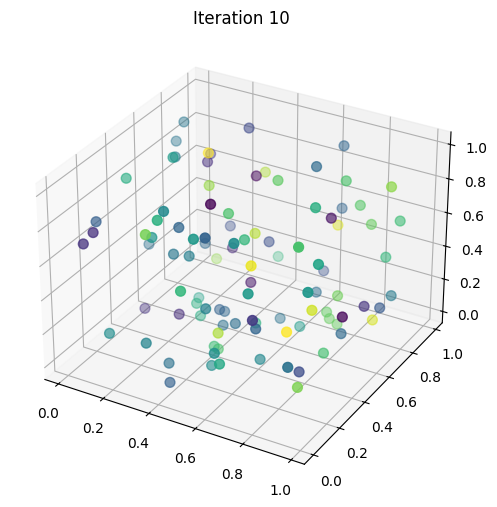

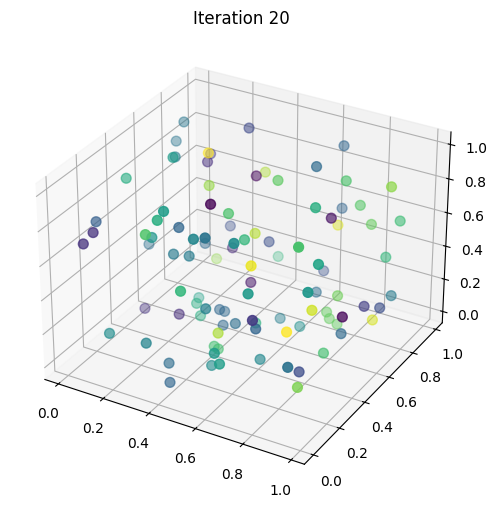

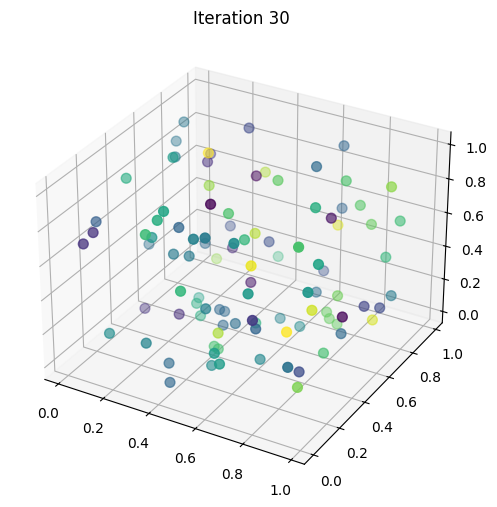

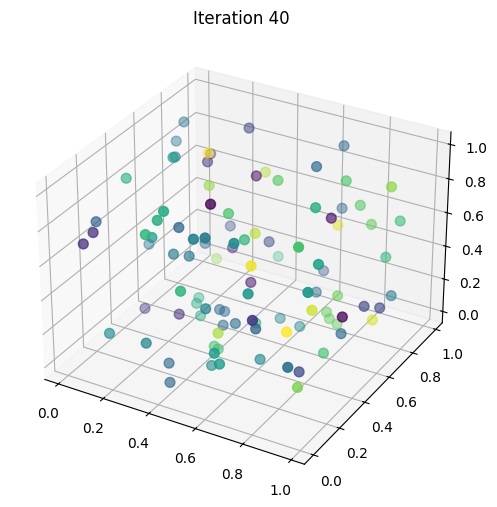

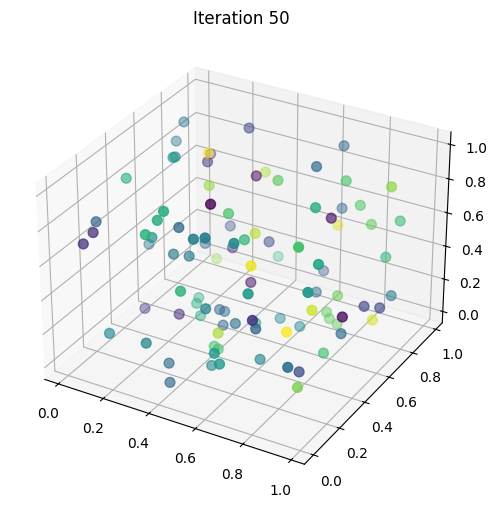

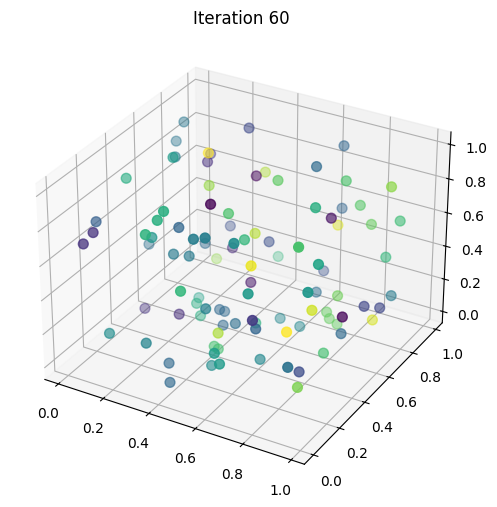

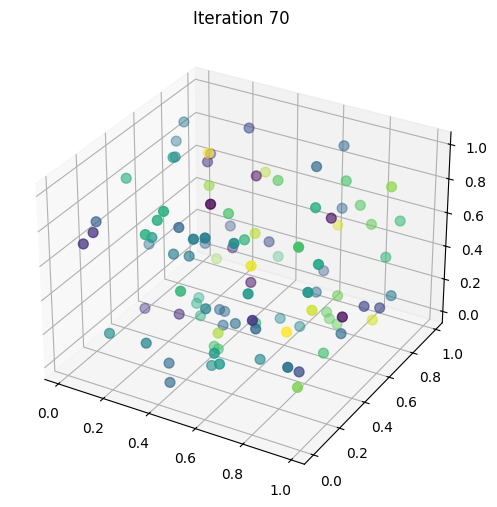

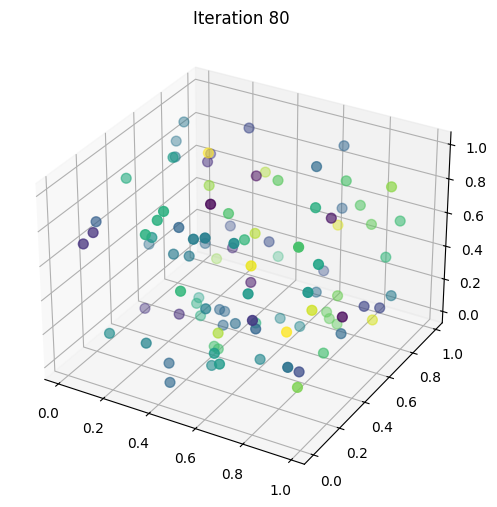

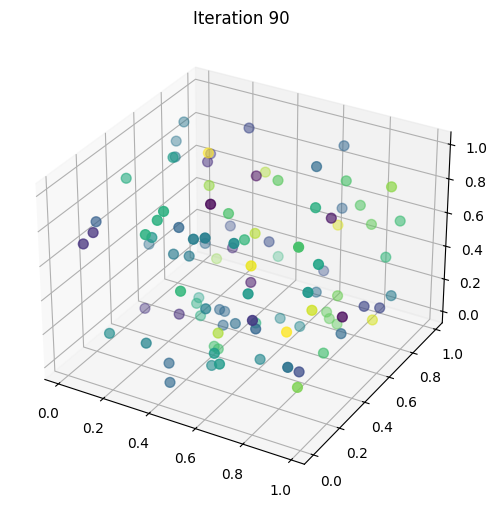

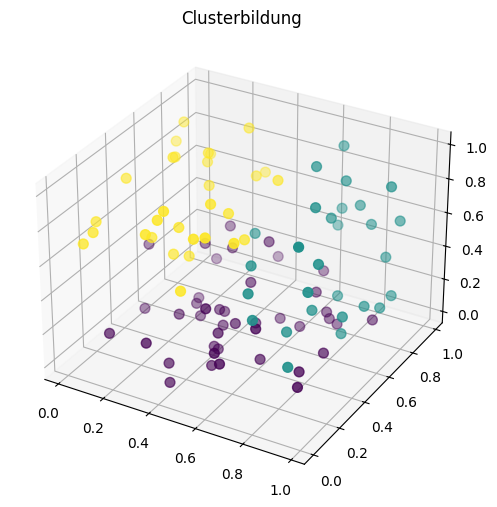

Clustergrößen: [42 28 30]
Simulation abgeschlossen. Analysiere die Ergebnisse.
Semantische Dichten: [0.68281462 0.00718233 0.43825525 0.69747138 0.63129348 0.02996226
 0.16964205 0.41189954 0.88297988 0.3870717  0.32620402 0.42513818
 0.71204387 0.65591734 0.87143194 0.32918989 0.39228467 0.6158072
 0.34716076 0.75526933 0.69578199 0.54031111 0.4499141  0.22254374
 0.34138329 0.93730684 0.99052751 0.34013816 0.69578199 0.48539249
 0.73187864 0.63001149 0.92968945 0.7966131  0.82401834 0.62352671
 0.21499537 0.15267346 0.13122584 0.2444826  0.23481024 0.48493072
 0.32652393 0.1258295  0.86847188 0.74692289 0.3450374  0.6559398
 0.75526933 0.75982223 0.14723455 0.56691423 0.54401022 0.61865773
 0.06853699 0.77243936 0.71449867 0.13831647 0.48253025 0.14723452
 0.75526933 0.02030407 0.46620693 0.16948273 0.91745441 0.70777736
 0.61865771 0.54884295 0.04650999 0.52760219 0.41189959 0.21493955
 0.24764591 0.65699982 0.32544083 0.30015062 0.6321517  0.46318821
 0.34013816 0.46328286 0.421747

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# 1. Definition der Basisparameter
n_points = 100  # Anzahl der Punkte im Raum
n_iterations = 100  # Anzahl der Iterationen zur Simulation der Entwicklung
influence_radius = 0.1  # Radius des Einflusses zwischen den Punkten

# 2. Initialisierung des Raums
# Initialisiere zufällige Positionen im Raum
positions = np.random.rand(n_points, 3)

# Initialisiere zufällige semantische Dichten für jeden Punkt
semantic_densities = np.random.rand(n_points)

# 3. Definition der Funktionen
def distance(pos1, pos2):
    """Berechnet die Distanz zwischen zwei Punkten."""
    return np.linalg.norm(pos1 - pos2)

def interaction(density1, density2, dist):
    """Definiert, wie zwei Punkte interagieren, basierend auf ihren semantischen Dichten und der Distanz."""
    # Je näher und ähnlicher die Dichten, desto stärker die Interaktion
    if dist < influence_radius:
        return (density2 - density1) * np.exp(-dist**2 / influence_radius**2)
    else:
        return 0

def update_density(density, interactions, learning_rate=0.1):
    """Aktualisiert die semantische Dichte basierend auf den Interaktionen."""
    return density + learning_rate * np.sum(interactions)

# 4. Simulationsschleife
for iteration in range(n_iterations):
    # Berechne die Interaktionen zwischen allen Paaren von Punkten
    all_interactions = np.zeros(n_points)
    for i in range(n_points):
        interactions = [interaction(semantic_densities[i], semantic_densities[j], distance(positions[i], positions[j]))
                        for j in range(n_points) if i != j]
        all_interactions[i] = np.sum(interactions)

    # Aktualisiere die semantischen Dichten basierend auf den Interaktionen
    semantic_densities = np.array([update_density(semantic_densities[i], all_interactions[i]) for i in range(n_points)])

    # Stelle sicher, dass die Dichten im Bereich [0, 1] bleiben
    semantic_densities = np.clip(semantic_densities, 0, 1)

    # Visualisierung (optional, nur alle paar Iterationen)
    if iteration % 10 == 0:
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], c=semantic_densities, cmap='viridis', s=50)
        ax.set_title(f'Iteration {iteration}')
        plt.show()

# 5. Analyse und Validierung
# Clusterbildung analysieren
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init = 'auto')
cluster_labels = kmeans.fit_predict(positions)

# Visualisierung der Cluster
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], c=cluster_labels, cmap='viridis', s=50)
ax.set_title('Clusterbildung')
plt.show()

# Ausgabe der Clustergrößen
cluster_sizes = np.bincount(cluster_labels)
print("Clustergrößen:", cluster_sizes)
# Hier könntest du spezifische Analysen durchführen, um die Gültigkeit des FZRK zu überprüfen
# Z.B. Clusterbildung analysieren, Stabilität der semantischen Dichten, etc.
print("Simulation abgeschlossen. Analysiere die Ergebnisse.")
print("Semantische Dichten:", semantic_densities)

